In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import re
import nltk
from nltk.corpus import stopwords


In [38]:

# Load the Excel file
file_path = 'youtube_comments_i6IOiUi6IYY.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
df = data.head()

# Basic Information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Author     653 non-null    object 
 1   Timestamp  653 non-null    object 
 2   Likes      208 non-null    float64
 3   Comment    653 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.5+ KB


            Likes
count  208.000000
mean    25.701923
std     90.520970
min      1.000000
25%      1.000000
50%      2.000000
75%     10.000000
max    948.000000
Author         0
Timestamp      0
Likes        445
Comment        0
dtype: int64


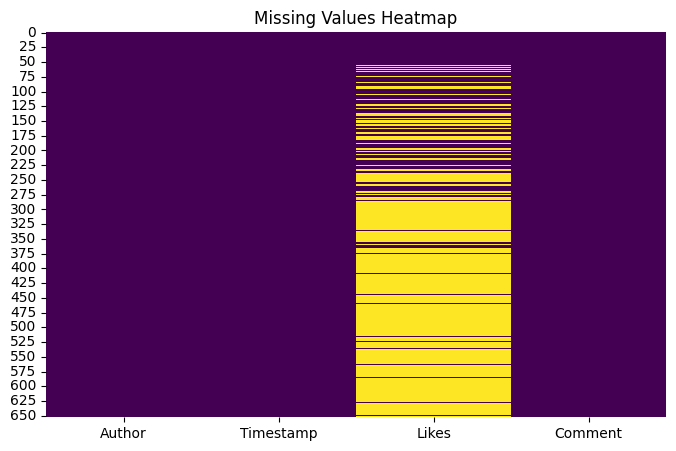

In [39]:


# Summary Statistics
summary_stats = data.describe()
print(summary_stats)

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Plotting missing values heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


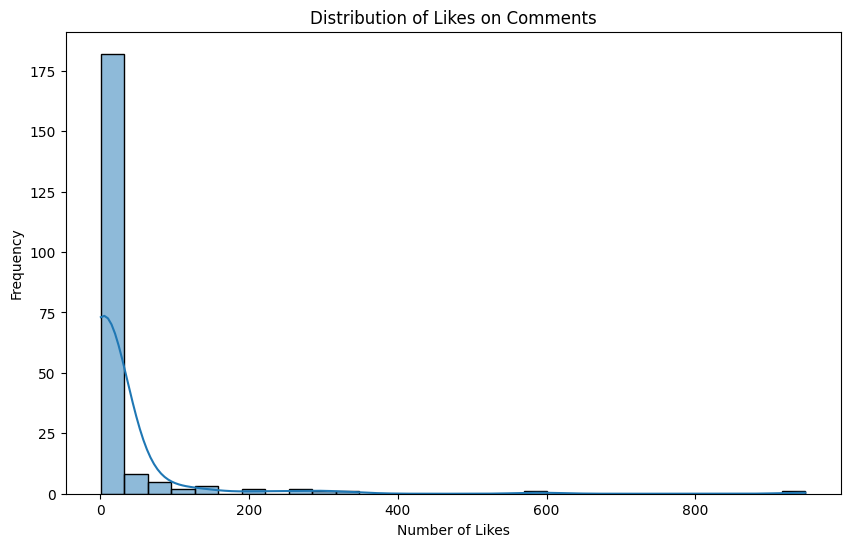

In [40]:

# Countplot for number of likes
plt.figure(figsize=(10, 6))
sns.histplot(data['Likes'], bins=30, kde=True)
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes on Comments')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31088\1874330354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='Blues_d')


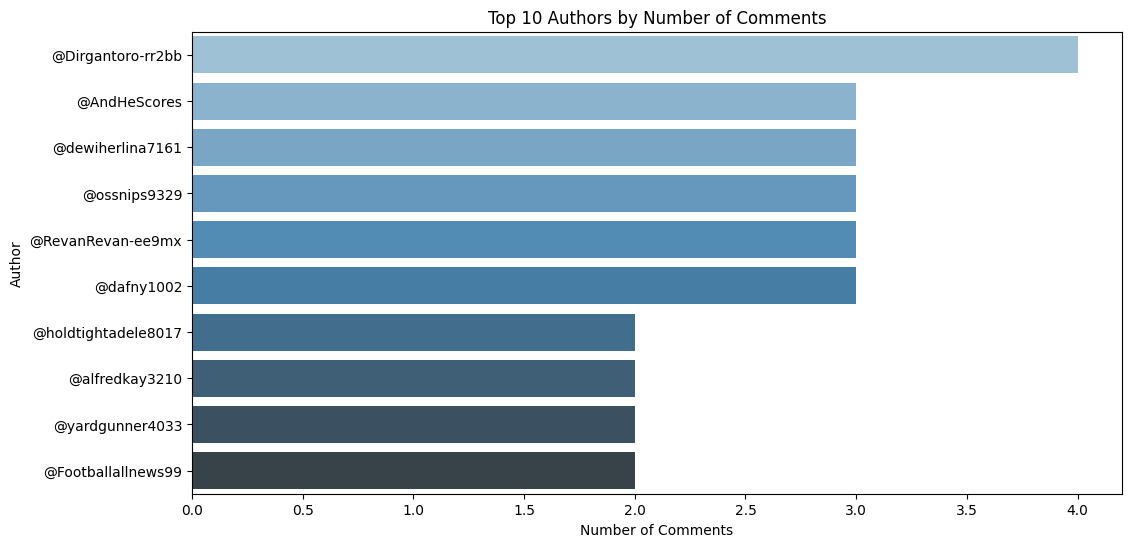

In [41]:

# Top Comment Authors by Number of Comments
top_authors = data['Author'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='Blues_d')
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.title('Top 10 Authors by Number of Comments')
plt.show()


In [42]:

# Generate Word Cloud for Comments Data
comments_text = ' '.join(comment for comment in data['Comment'] if pd.notnull(comment))
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(comments_text)


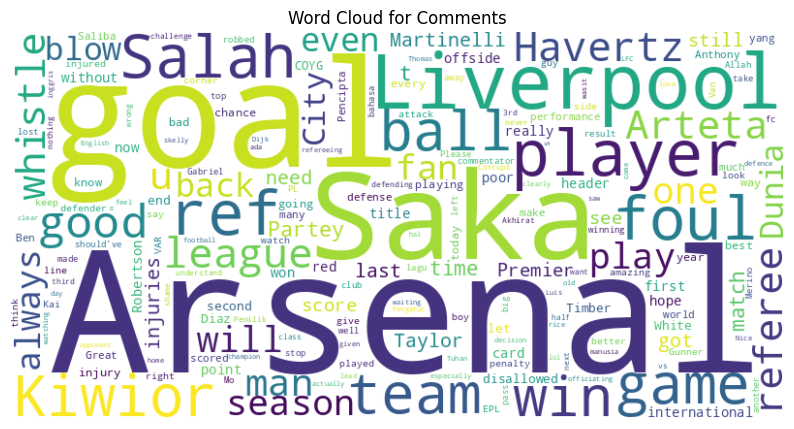

<Figure size 1200x800 with 0 Axes>

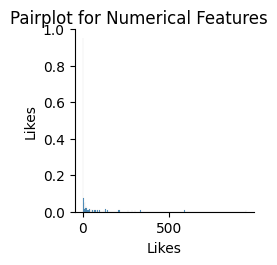

In [43]:

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()

# Plotting Data Distribution for Numerical Features
plt.figure(figsize=(12, 8))
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()


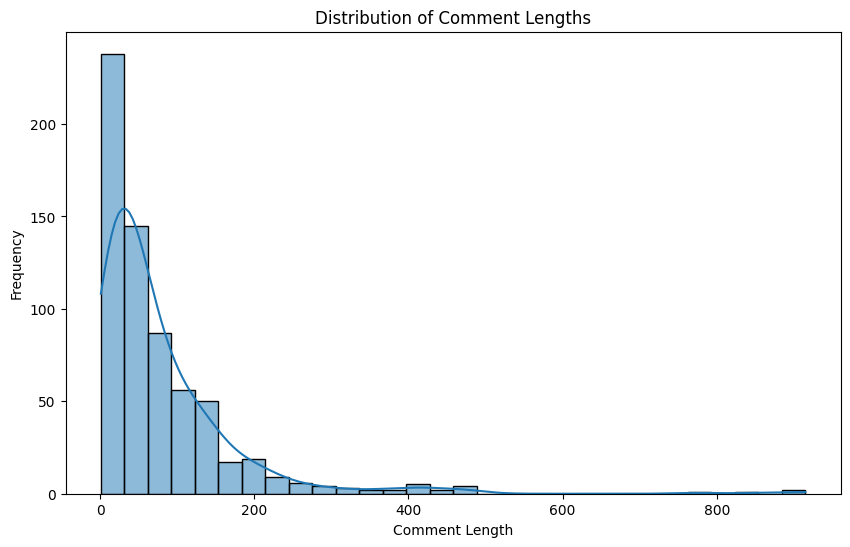

In [44]:

# Plotting Comment Length Histogram
data['Comment_Length'] = data['Comment'].apply(lambda x: len(x) if pd.notnull(x) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data['Comment_Length'], bins=30, kde=True)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()


In [45]:
# Analysis of Top Words in Comments (excluding stopwords)
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31088\430248516.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


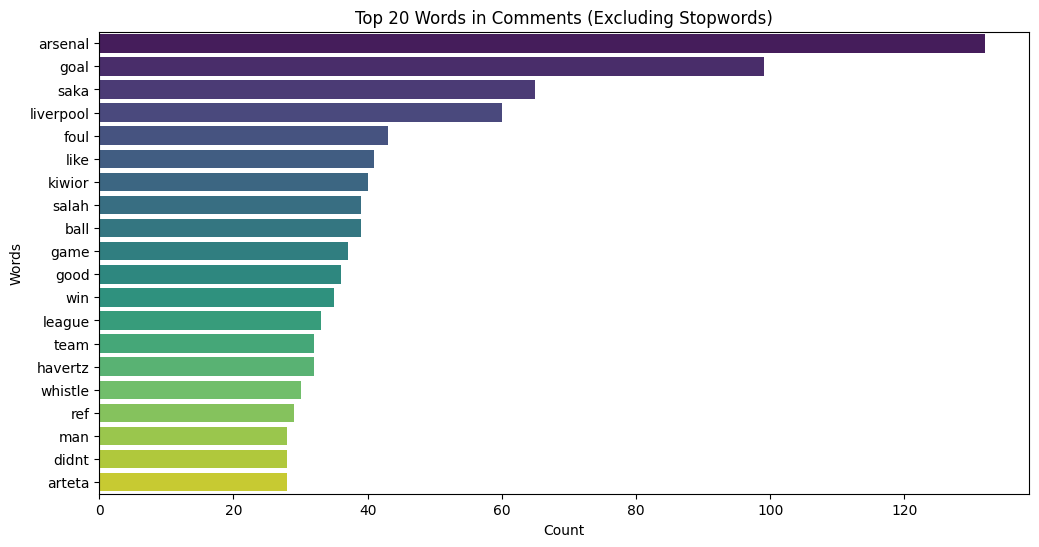

In [46]:
# Analysis of Top Words in Comments (excluding stopwords)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing comments to remove stopwords and special characters
processed_comments = [re.sub(r'[^a-zA-Z ]', '', comment.lower()) for comment in data['Comment'] if pd.notnull(comment)]
filtered_words = [word for comment in processed_comments for word in comment.split() if word not in stop_words]

# Counting the frequency of the top words
if filtered_words:
    top_words = Counter(filtered_words).most_common(20)

    # Plotting the top words
    words, counts = zip(*top_words)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 20 Words in Comments (Excluding Stopwords)')
    plt.show()
else:
    print("No valid words available for analysis.")



[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31088\2762005851.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spam_Label', data=data, palette='Set1')


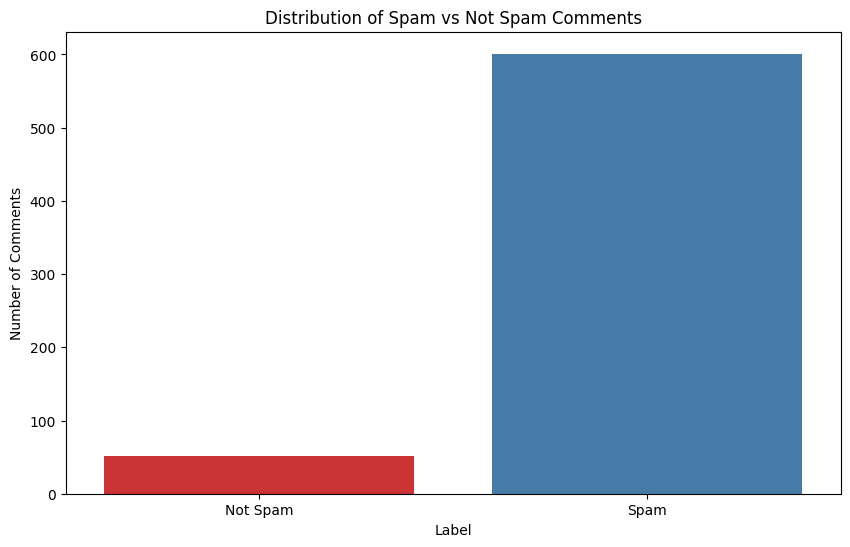

In [47]:

# Spam Detection using TF-IDF and Clustering
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing the comments for spam detection
cleaned_comments = [re.sub(r'[^a-zA-Z ]', '', comment.lower()) for comment in data['Comment'] if pd.notnull(comment)]
filtered_comments = [' '.join(word for word in comment.split() if word not in stop_words) for comment in cleaned_comments]

# Vectorizing the comments using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(filtered_comments)

# Applying KMeans Clustering to detect potential spam clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
data['Spam_Label'] = labels

# Adding a column to the dataset indicating potential spam (1 - Spam, 0 - Not Spam)
data['Spam_Label'] = data['Spam_Label'].apply(lambda x: 'Spam' if x == labels[np.argmax(np.bincount(labels))] else 'Not Spam')

# Visualizing the distribution of Spam vs Not Spam comments
plt.figure(figsize=(10, 6))
sns.countplot(x='Spam_Label', data=data, palette='Set1')
plt.xlabel('Label')
plt.ylabel('Number of Comments')
plt.title('Distribution of Spam vs Not Spam Comments')
plt.show()


Accuracy of KNN Spam Detection Model: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.48      0.63       119
           1       0.11      0.67      0.20        12

    accuracy                           0.50       131
   macro avg       0.52      0.57      0.41       131
weighted avg       0.86      0.50      0.59       131


Confusion Matrix:
 [[57 62]
 [ 4  8]]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31088\3166584350.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spam_Label', data=data, palette='Set1')


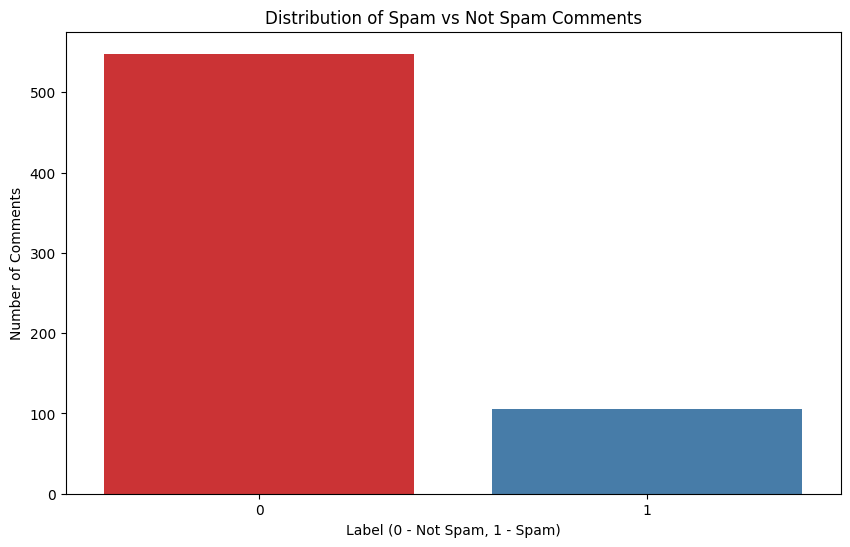

In [48]:
# Spam Detection using TF-IDF and K-Nearest Neighbors (KNN)
# Preprocessing the comments for spam detection
cleaned_comments = [re.sub(r'[^a-zA-Z ]', '', comment.lower()) for comment in data['Comment'] if pd.notnull(comment)]
filtered_comments = [' '.join(word for word in comment.split() if word not in stop_words) for comment in cleaned_comments]

# Vectorizing the comments using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(filtered_comments)

# Create target labels for demonstration purposes (0 - Not Spam, 1 - Spam)
# Here we use a heuristic approach where comments with very few words or repeating phrases are marked as spam for illustration.
data['Spam_Label'] = data['Comment'].apply(lambda x: 1 if len(str(x).split()) < 3 or 'subscribe' in str(x).lower() else 0)
y = data['Spam_Label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Spam Detection Model: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing Spam vs Not Spam
plt.figure(figsize=(10, 6))
sns.countplot(x='Spam_Label', data=data, palette='Set1')
plt.xlabel('Label (0 - Not Spam, 1 - Spam)')
plt.ylabel('Number of Comments')
plt.title('Distribution of Spam vs Not Spam Comments')
plt.show()
